In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_features = train.drop(['SalePrice','Id'],axis=1)
test = test.drop(['Id'],axis=1)

In [6]:
train_features.shape

(1460, 79)

In [7]:
test.shape

(1459, 79)

# Deal with missing values

In [8]:
def DropMissingValue(data:pd,threshold = 0.3) -> pd: # drop missing value that exceed threshold of number of observations
    df_null = data.isnull().sum()
    null_index = df_null[df_null >= threshold*data.shape[0]].index
    data = data.drop(null_index,axis=1)
    return data

In [9]:
train_new = DropMissingValue(train_features)
test_new = DropMissingValue(test)

In [10]:
train_new.columns == test_new.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# Fill nan with mean for float numbers except for year,fill nan with mode for categorical values

In [11]:
train_null = train_new.isnull().sum().sort_values(ascending=False) != 0
train_null_idx = train_null[train_null].index

In [12]:
test_null = test_new.isnull().sum().sort_values(ascending=False) != 0
test_null_idx = test_null[test_null].index

In [13]:
train_new[train_null_idx].dtypes

LotFrontage     float64
GarageFinish     object
GarageType       object
GarageCond       object
GarageQual       object
GarageYrBlt     float64
BsmtExposure     object
BsmtFinType2     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

In [14]:
train_null_idx

Index(['LotFrontage', 'GarageFinish', 'GarageType', 'GarageCond', 'GarageQual',
       'GarageYrBlt', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1',
       'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [15]:
train_new[['LotFrontage','MasVnrArea']] = train_new[['LotFrontage','MasVnrArea']].fillna(train_new.mean().iloc[0])

In [16]:
train_new[[ 'GarageCond', 'GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
           'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType','Electrical']] = train_new[[ 'GarageCond', 'GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
           'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType','Electrical']].fillna(train_new.mode().iloc[0])

In [17]:
test_null_idx

Index(['LotFrontage', 'GarageFinish', 'GarageCond', 'GarageQual',
       'GarageYrBlt', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MasVnrArea', 'MSZoning',
       'Functional', 'BsmtHalfBath', 'BsmtFullBath', 'Utilities',
       'Exterior2nd', 'Exterior1st', 'KitchenQual', 'TotalBsmtSF',
       'GarageCars', 'SaleType', 'BsmtUnfSF', 'GarageArea', 'BsmtFinSF2',
       'BsmtFinSF1'],
      dtype='object')

In [18]:
test_new[['LotFrontage','MasVnrArea','BsmtHalfBath','BsmtFullBath','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF',
          'GarageArea']] = test_new[['LotFrontage','MasVnrArea','BsmtHalfBath','BsmtFullBath','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF',
          'GarageArea']].fillna(train_new.mean().iloc[0])

In [19]:
test_new[[ 'GarageCond', 'GarageQual', 'GarageYrBlt',
       'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'BsmtUnfSF',
       'SaleType', 'Exterior2nd', 'Exterior1st', 'GarageCars', 'KitchenQual']] = test_new[[ 'GarageCond', 'GarageQual', 'GarageYrBlt',
       'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'BsmtUnfSF',
       'SaleType', 'Exterior2nd', 'Exterior1st', 'GarageCars', 'KitchenQual']].fillna(train_new.mode().iloc[0])

# Categorical features

In [20]:
df = pd.concat([train_new,test_new])  #Combine train and test data

In [21]:
def Dummies(data:pd) -> pd:  # dummy all categorical features
    object_features = data.dtypes[df.dtypes == object].index
    dummies = pd.get_dummies(data[object_features])
    df_new = pd.concat([data,dummies],axis=1)
    df_new.drop(columns=object_features,inplace=True)
    df_new = df_new.loc[:,~df_new.columns.duplicated()]
    return df_new

In [22]:
df_new = Dummies(df)

In [23]:
df_new.shape

(2919, 270)

# Split the train and test back

In [24]:
train_new = df_new.iloc[:1460,:]
test_new = df_new.iloc[1460:,:]

# Do some feature engineering

In [25]:
train_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
np.corrcoef(train_new['OverallQual'],train_new['OverallCond'])  
# these two features looks correlated as names implies, but they are not correlated much

array([[ 1.        , -0.09193234],
       [-0.09193234,  1.        ]])

YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)<br>
MoSold: Month Sold (MM)<br>
YrSold: Year Sold (YYYY)


House's life and remodel  may be a critical feature to price the house

In [27]:
# do something with YearBuilt and YearRemodAdd and MoSold: Month Sold (MM) and YrSold: Year Sold (YYYY)
train_new['LifeBuilt'] = train_new['MoSold']/12 + train_new['YrSold'] - train_new['YearBuilt']
train_new['LifeRemod'] = train_new['MoSold']/12 + train_new['YrSold'] - train_new['YearRemodAdd']

In [28]:
test_new['LifeBuilt'] = test_new['MoSold']/12 + test_new['YrSold'] - test_new['YearBuilt']
test_new['LifeRemod'] = test_new['MoSold']/12 + test_new['YrSold'] - test_new['YearRemodAdd']

In [29]:
train_new = train_new.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd'],axis=1)
test_new = test_new.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd'],axis=1)

YearBuilt and YearRemodAdd : Result does not improve

Next: <br>
Try to do something with square feet : <br>

BsmtFinSF2: Type 2 finished square feet<br>
BsmtUnfSF: Unfinished square feet of basement area<br>
TotalBsmtSF: Total square feet of basement area<br>

1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>

GarageArea: Size of garage in square feet<br>

WoodDeckSF: Wood deck area in square feet<br>

OpenPorchSF: Open porch area in square feet<br>

EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>

# Build model

In [30]:
X = train_new
y = train['SalePrice']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost as xgb

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [33]:
xgb_model = xgb.XGBRegressor()

In [34]:
xgb_model.fit(X_train,y_train)

[03:47:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# HyperParameter Optimization

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
n_estimator = [20,30,50,100,120,200,300,500,900,1000]
booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]
max_depth = [2,3,5,10,15]
learning_rate = [0.05,0.1,0.15,0.2,0.25,0.3]
min_childweight = [1,2,3,4,5]

In [38]:
hyperparametergrid = {'n_estimator':n_estimator,
                      'max_depth':max_depth,
                     'learning_rate':learning_rate,
                     'min_child_weight':min_childweight,
                     'booster':booster,
                     'base_score':base_score}

In [39]:
random_cv = RandomizedSearchCV(estimator=xgb_model,
                              param_distributions=hyperparametergrid,
                              cv=5,scoring='neg_mean_squared_error',return_train_score=True,verbose=5,random_state=123)

In [40]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[03:48:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-132730198.049, test=-1341603838.696), total=   0.7s
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[03:48:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-116062842.246, test=-1284177520.759), total=   0.7s
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[03:48:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-151579874.982, test=-488709312.193), total=   0.7s
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[03:48:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-122207540.544, test=-652517596.729), total=   0.7s
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[03:48:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-137026727.376, test=-571003819.738), total=   0.7s
[CV] n_estimator=300, min_child_weight=5, max_depth=5, learning_rate=0.25, booster=gblinear, base_score=1 
[03:48:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=300, min_child_weight=5, max_depth=5, learning_rate=0.25, booster=gblinear, base_score=1, score=(train=-932906349.119, test=-3453422528.952), total=   0.5s
[CV] n_estimator=300, min_child_weight=5, max_depth=5, learning_rate=0.25, booster=gblinear, base_score=1 
[03:48:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=300, min_child_weight=5, max_depth=5, learning_rate=0.25, booster=gblinear, base_score=1, scor

[CV]  n_estimator=100, min_child_weight=2, max_depth=2, learning_rate=0.1, booster=gblinear, base_score=0.75, score=(train=-1470892001.614, test=-925897628.867), total=   0.7s
[CV] n_estimator=100, min_child_weight=2, max_depth=2, learning_rate=0.1, booster=gblinear, base_score=0.75 
[03:48:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=100, min_child_weight=2, max_depth=2, learning_rate=0.1, booster=gblinear, base_score=0.75, score=(train=-1476842873.346, test=-932170815.054), total=   0.7s
[CV] n_estimator=200, min_child_weight=4, max_depth=2, learning_rate=0.2, booster=gbtree, base_score=1 
[03:48:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=200, min_child_weight=4, max_depth=2, learning_rate=0.2, booster=gbtree, base_score=1, sc

[CV]  n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25, score=(train=-371583296.954, test=-556182945.489), total=   0.7s
[CV] n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25 
[03:48:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25, score=(train=-310042239.749, test=-696061766.164), total=   0.7s
[CV] n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25 
[03:48:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.6s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                      

In [41]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimator=50,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

# Optimize model using hyperparameters

In [42]:
xgb_model_opt = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimator=50,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [43]:
xgb_model_opt.fit(X_train,y_train)

[03:49:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimator=50,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

# Predict using Optimized model

In [44]:
preds = xgb_model_opt.predict(X_test)

In [45]:
RMSE = sqrt(mean_squared_error(y_test,preds))

In [46]:
print(RMSE)  # error is higher than yesterday after doing the features of YearBuilt,YearRemodAdd

24234.138023652016


# Predict Test dataset

In [47]:
sub = pd.read_csv('sample_submission.csv')

In [48]:
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [49]:
saleprice = xgb_model_opt.predict(test_new )

In [50]:
sub['SalePrice'] = saleprice

In [51]:
sub.to_csv('submission.csv',index=False)

In [52]:
sub.head()

,Id,SalePrice
0,1461,122163.390625
1,1462,153987.625000
2,1463,179107.515625
3,1464,190180.546875
4,1465,193584.218750


# Try Keras

In [309]:
import tensorflow.keras
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [292]:
np.random.seed(1)
def regress():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(60,input_shape=(input_shape,),activation='relu'))
    #model.add(BatchNormalization())
    model.add(tf.keras.layers.Dense(25,activation='relu'))
    #model.add(BatchNormalization())
    model.add(tf.keras.layers.Dense(5,activation='relu'))
    #model.add(BatchNormalization())
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model
#model = regress()

In [293]:
#opt = SGD(lr=0.2, momentum=0.8)

In [296]:
model = KerasRegressor(build_fn=regress)

In [320]:
param_grid = dict(epochs = [500,600,800,1000,1100,1200],
                  batch_size = [ 60, 80, 100])
                
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,cv=5)
grid_result = grid.fit(X, y)

Train on 1460 samples
Epoch 1/1100
1460/1460 [==============================] - 0s 89us/sample - loss: 38717034383.7808
Epoch 2/1100
1460/1460 [==============================] - 0s 20us/sample - loss: 37962948215.2329
Epoch 3/1100
1460/1460 [==============================] - 0s 22us/sample - loss: 36571636216.9863
Epoch 4/1100
1460/1460 [==============================] - 0s 24us/sample - loss: 33897488552.3288
Epoch 5/1100
1460/1460 [==============================] - 0s 21us/sample - loss: 29368817467.6164
Epoch 6/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 22999837625.8630
Epoch 7/1100
1460/1460 [==============================] - 0s 23us/sample - loss: 16073836291.5068
Epoch 8/1100
1460/1460 [==============================] - 0s 23us/sample - loss: 11672886243.9452
Epoch 9/1100
1460/1460 [==============================] - 0s 23us/sample - loss: 9380891760.2192
Epoch 10/1100
1460/1460 [==============================] - 0s 22us/sample - loss: 8344879384.5479

1460/1460 [==============================] - 0s 19us/sample - loss: 1783086655.7808
Epoch 85/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1782934577.0959
Epoch 86/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 1775163139.5068
Epoch 87/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 1768553761.3151
Epoch 88/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 1761138647.6712
Epoch 89/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 1754080423.4521
Epoch 90/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1751867339.3973
Epoch 91/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1748878381.5890
Epoch 92/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 1742294507.8356
Epoch 93/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1748925228.7123
Epoch 94/1100
1460/1460 [=========

1460/1460 [==============================] - 0s 19us/sample - loss: 1486335315.2877
Epoch 168/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1478491279.7808
Epoch 169/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 1478464469.9178
Epoch 170/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 1488715502.4658
Epoch 171/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1473292147.7260
Epoch 172/1100
1460/1460 [==============================] - 0s 20us/sample - loss: 1476673081.4247
Epoch 173/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1467948418.6301
Epoch 174/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1478321879.6712
Epoch 175/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 1464357283.0685
Epoch 176/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1455999619.5068
Epoch 177/1100
1460/1460 

1460/1460 [==============================] - 0s 18us/sample - loss: 1266913595.6164
Epoch 250/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 1264891279.7808
Epoch 251/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1254548882.4110
Epoch 252/1100
1460/1460 [==============================] - 0s 16us/sample - loss: 1254860086.3562
Epoch 253/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1259259042.1918
Epoch 254/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1250008609.3151
Epoch 255/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1235390584.9863
Epoch 256/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 1242028850.8493
Epoch 257/1100
1460/1460 [==============================] - 0s 16us/sample - loss: 1230261714.4110
Epoch 258/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1236411686.5753
Epoch 259/1100
1460/1460 

1460/1460 [==============================] - 0s 18us/sample - loss: 1096352398.4658
Epoch 332/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1087147058.8493
Epoch 333/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1099721037.1507
Epoch 334/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 1089385454.4658
Epoch 335/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1083474446.9041
Epoch 336/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1084934684.9315
Epoch 337/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 1093994307.0685
Epoch 338/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1075995495.4521
Epoch 339/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1092194603.8356
Epoch 340/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 1096915939.9452
Epoch 341/1100
1460/1460 

1460/1460 [==============================] - 0s 17us/sample - loss: 971407715.9452
Epoch 414/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 979127045.2603
Epoch 415/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 978755862.7945
Epoch 416/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 978786984.3288
Epoch 417/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 976383612.4932
Epoch 418/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 994162091.8356
Epoch 419/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 969396997.2603
Epoch 420/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 979397205.4795
Epoch 421/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 965569993.2055
Epoch 422/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 987960739.9452
Epoch 423/1100
1460/1460 [=========

1460/1460 [==============================] - 0s 18us/sample - loss: 881692956.0548
Epoch 497/1100
1460/1460 [==============================] - 0s 20us/sample - loss: 884416370.8493
Epoch 498/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 889087879.0137
Epoch 499/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 877376149.9178
Epoch 500/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 902790852.3836
Epoch 501/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 886414521.4247
Epoch 502/1100
1460/1460 [==============================] - 0s 20us/sample - loss: 903823342.4658
Epoch 503/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 902228986.7397
Epoch 504/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 877349393.5342
Epoch 505/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 875233146.3014
Epoch 506/1100
1460/1460 [=========

1460/1460 [==============================] - 0s 21us/sample - loss: 807974376.3288
Epoch 580/1100
1460/1460 [==============================] - 0s 24us/sample - loss: 800966618.3014
Epoch 581/1100
1460/1460 [==============================] - 0s 20us/sample - loss: 814539398.5753
Epoch 582/1100
1460/1460 [==============================] - 0s 21us/sample - loss: 805296510.2466
Epoch 583/1100
1460/1460 [==============================] - 0s 21us/sample - loss: 796177038.0274
Epoch 584/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 800693397.9178
Epoch 585/1100
1460/1460 [==============================] - 0s 22us/sample - loss: 809746377.2055
Epoch 586/1100
1460/1460 [==============================] - 0s 20us/sample - loss: 798011127.4521
Epoch 587/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 808508454.1370
Epoch 588/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 806273693.8082
Epoch 589/1100
1460/1460 [=========

1460/1460 [==============================] - 0s 20us/sample - loss: 729335332.8219
Epoch 663/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 727327368.3288
Epoch 664/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 736353292.2740
Epoch 665/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 731445710.0274
Epoch 666/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 729468523.8356
Epoch 667/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 735597665.3151
Epoch 668/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 726106381.1507
Epoch 669/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 759980501.9178
Epoch 670/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 737187047.0137
Epoch 671/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 744236240.6575
Epoch 672/1100
1460/1460 [=========

1460/1460 [==============================] - 0s 20us/sample - loss: 685701501.3699
Epoch 746/1100
1460/1460 [==============================] - 0s 20us/sample - loss: 668869005.5890
Epoch 747/1100
1460/1460 [==============================] - 0s 20us/sample - loss: 677580621.1507
Epoch 748/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 664401613.1507
Epoch 749/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 667267623.4521
Epoch 750/1100
1460/1460 [==============================] - 0s 20us/sample - loss: 670110529.7534
Epoch 751/1100
1460/1460 [==============================] - 0s 20us/sample - loss: 688051172.8219
Epoch 752/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 663788456.3288
Epoch 753/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 665565473.3151
Epoch 754/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 668410751.1233
Epoch 755/1100
1460/1460 [=========

1460/1460 [==============================] - 0s 18us/sample - loss: 622475693.5890
Epoch 829/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 623211150.9041
Epoch 830/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 616981501.3699
Epoch 831/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 629304537.8630
Epoch 832/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 619194955.7260
Epoch 833/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 613226139.1781
Epoch 834/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 616836545.7534
Epoch 835/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 615541814.7945
Epoch 836/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 613393729.3151
Epoch 837/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 612497520.2192
Epoch 838/1100
1460/1460 [=========

1460/1460 [==============================] - 0s 19us/sample - loss: 582557948.0548
Epoch 912/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 578550080.8767
Epoch 913/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 562136572.4932
Epoch 914/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 587810011.1781
Epoch 915/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 566618515.7260
Epoch 916/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 566735089.9726
Epoch 917/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 571500242.8493
Epoch 918/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 578355859.9452
Epoch 919/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 564860058.3014
Epoch 920/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 569854005.6986
Epoch 921/1100
1460/1460 [=========

1460/1460 [==============================] - 0s 19us/sample - loss: 519334975.5616
Epoch 995/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 530856588.7123
Epoch 996/1100
1460/1460 [==============================] - 0s 20us/sample - loss: 525055427.5068
Epoch 997/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 515338751.1233
Epoch 998/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 524981417.2055
Epoch 999/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 521093223.8904
Epoch 1000/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 526596149.9178
Epoch 1001/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 522008428.7123
Epoch 1002/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 527731825.0959
Epoch 1003/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 522935826.8493
Epoch 1004/1100
1460/1460 [====

Epoch 1077/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 487387527.4521
Epoch 1078/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 467207521.7534
Epoch 1079/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 476018550.3562
Epoch 1080/1100
1460/1460 [==============================] - 0s 22us/sample - loss: 466592519.6712
Epoch 1081/1100
1460/1460 [==============================] - 0s 21us/sample - loss: 466376941.5890
Epoch 1082/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 479890666.0822
Epoch 1083/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 476899900.0548
Epoch 1084/1100
1460/1460 [==============================] - 0s 18us/sample - loss: 461608166.5753
Epoch 1085/1100
1460/1460 [==============================] - 0s 17us/sample - loss: 479073461.4795
Epoch 1086/1100
1460/1460 [==============================] - 0s 19us/sample - loss: 465989689.8630
Epoch 1087

In [321]:
grid_result.best_params_

{'batch_size': 80, 'epochs': 1100}

In [323]:
model = KerasRegressor(build_fn=regress,batch_size=80)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1100,verbose=1)

Train on 1168 samples, validate on 292 samples
Epoch 1/1100
1168/1168 [==============================] - 0s 141us/sample - loss: 38893501257.6438 - val_loss: 37274883731.2877
Epoch 2/1100
1168/1168 [==============================] - 0s 18us/sample - loss: 38036205876.6027 - val_loss: 36338817949.8082
Epoch 3/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 36782893027.9452 - val_loss: 34902650066.4110
Epoch 4/1100
1168/1168 [==============================] - 0s 25us/sample - loss: 34794994786.1918 - val_loss: 32528813322.5205
Epoch 5/1100
1168/1168 [==============================] - 0s 24us/sample - loss: 31647038506.0822 - val_loss: 28864099847.0137
Epoch 6/1100
1168/1168 [==============================] - 0s 25us/sample - loss: 27126067003.6164 - val_loss: 23875979123.7260
Epoch 7/1100
1168/1168 [==============================] - 0s 25us/sample - loss: 21640977590.3562 - val_loss: 18021553713.0959
Epoch 8/1100
1168/1168 [==============================] - 0s 23

1168/1168 [==============================] - 0s 19us/sample - loss: 1978656565.4795 - val_loss: 2090711131.1781
Epoch 66/1100
1168/1168 [==============================] - 0s 24us/sample - loss: 1961730861.5890 - val_loss: 2083210723.9452
Epoch 67/1100
1168/1168 [==============================] - 0s 25us/sample - loss: 1958872056.1096 - val_loss: 2078736085.9178
Epoch 68/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 1941880130.6301 - val_loss: 2069491498.9589
Epoch 69/1100
1168/1168 [==============================] - 0s 19us/sample - loss: 1941157435.6164 - val_loss: 2062215318.7945
Epoch 70/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1932217224.7671 - val_loss: 2055460941.1507
Epoch 71/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1938916919.2329 - val_loss: 2051366054.5753
Epoch 72/1100
1168/1168 [==============================] - 0s 19us/sample - loss: 1929563619.9452 - val_loss: 2046741298.8493
Epoch 

1168/1168 [==============================] - 0s 21us/sample - loss: 1735187775.1233 - val_loss: 1908977445.6986
Epoch 130/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1755057192.3288 - val_loss: 1906858988.7123
Epoch 131/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1733471311.7808 - val_loss: 1910452356.3836
Epoch 132/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1761753786.7397 - val_loss: 1904394467.9452
Epoch 133/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1753751956.1644 - val_loss: 1903139708.4932
Epoch 134/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1723182996.1644 - val_loss: 1903984401.5342
Epoch 135/1100
1168/1168 [==============================] - 0s 19us/sample - loss: 1732742855.8904 - val_loss: 1902866754.1918
Epoch 136/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 1730964769.3151 - val_loss: 1900881812.1644

1168/1168 [==============================] - 0s 21us/sample - loss: 1640909090.1918 - val_loss: 1853149094.5753
Epoch 194/1100
1168/1168 [==============================] - 0s 25us/sample - loss: 1627172131.0685 - val_loss: 1848108449.3151
Epoch 195/1100
1168/1168 [==============================] - 0s 24us/sample - loss: 1621506038.3562 - val_loss: 1846808328.7671
Epoch 196/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1632254698.0822 - val_loss: 1850939174.5753
Epoch 197/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 1642620328.3288 - val_loss: 1852732349.3699
Epoch 198/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1660990521.8630 - val_loss: 1861699114.0822
Epoch 199/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1621691800.5479 - val_loss: 1852620360.7671
Epoch 200/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1633519177.6438 - val_loss: 1847330165.4795

1168/1168 [==============================] - 0s 21us/sample - loss: 1545598611.2877 - val_loss: 1806103376.6575
Epoch 258/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1550933131.3973 - val_loss: 1803379831.2329
Epoch 259/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 1544881262.4658 - val_loss: 1800950948.8219
Epoch 260/1100
1168/1168 [==============================] - 0s 25us/sample - loss: 1545587214.9041 - val_loss: 1802038706.8493
Epoch 261/1100
1168/1168 [==============================] - 0s 24us/sample - loss: 1549676771.0685 - val_loss: 1801656487.8904
Epoch 262/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1541204947.2877 - val_loss: 1801655339.8356
Epoch 263/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1541200833.7534 - val_loss: 1808582170.3014
Epoch 264/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1544369826.1918 - val_loss: 1802808877.5890

1168/1168 [==============================] - 0s 20us/sample - loss: 1505296757.4795 - val_loss: 1772253461.0411
Epoch 322/1100
1168/1168 [==============================] - 0s 24us/sample - loss: 1485738595.9452 - val_loss: 1774614122.9589
Epoch 323/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1483011289.4247 - val_loss: 1773028811.3973
Epoch 324/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1475756899.0685 - val_loss: 1771844195.0685
Epoch 325/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1483161778.8493 - val_loss: 1788282187.3973
Epoch 326/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1488083058.8493 - val_loss: 1769650193.5342
Epoch 327/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1479381902.0274 - val_loss: 1769328233.2055
Epoch 328/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1480719296.8767 - val_loss: 1767460464.2192

1168/1168 [==============================] - 0s 23us/sample - loss: 1438231741.3699 - val_loss: 1748719098.7397
Epoch 386/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1433933784.5479 - val_loss: 1746931985.5342
Epoch 387/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 1433395215.7808 - val_loss: 1756743965.8082
Epoch 388/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1447451152.6575 - val_loss: 1747051709.3699
Epoch 389/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1441095298.6301 - val_loss: 1744750104.5479
Epoch 390/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1447011803.1781 - val_loss: 1747014803.2877
Epoch 391/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1436719224.9863 - val_loss: 1747513557.9178
Epoch 392/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1432078863.7808 - val_loss: 1746479502.0274

1168/1168 [==============================] - 0s 23us/sample - loss: 1402758911.1233 - val_loss: 1745264797.8082
Epoch 450/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 1401473639.4521 - val_loss: 1734857177.4247
Epoch 451/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 1411894695.4521 - val_loss: 1737366776.1096
Epoch 452/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1398965155.9452 - val_loss: 1731745834.9589
Epoch 453/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1417885548.7123 - val_loss: 1733853941.4795
Epoch 454/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1407717932.7123 - val_loss: 1738949917.8082
Epoch 455/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1425575849.2055 - val_loss: 1736107676.0548
Epoch 456/1100
1168/1168 [==============================] - 0s 19us/sample - loss: 1411840828.0548 - val_loss: 1739046706.8493

1168/1168 [==============================] - 0s 21us/sample - loss: 1376153839.3425 - val_loss: 1726294193.9726
Epoch 514/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1370150821.6986 - val_loss: 1717046279.0137
Epoch 515/1100
1168/1168 [==============================] - 0s 25us/sample - loss: 1371904487.4521 - val_loss: 1725452764.0548
Epoch 516/1100
1168/1168 [==============================] - 0s 25us/sample - loss: 1379351249.5342 - val_loss: 1720011651.5068
Epoch 517/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1391809897.2055 - val_loss: 1728137672.7671
Epoch 518/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 1385085502.2466 - val_loss: 1719613170.8493
Epoch 519/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1377505845.4795 - val_loss: 1727581832.7671
Epoch 520/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1376831524.8219 - val_loss: 1716496971.3973

1168/1168 [==============================] - 0s 21us/sample - loss: 1342863614.2466 - val_loss: 1707852558.0274
Epoch 578/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1348532971.8356 - val_loss: 1715787684.8219
Epoch 579/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1343078337.7534 - val_loss: 1703237842.4110
Epoch 580/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1343527384.5479 - val_loss: 1739737350.1370
Epoch 581/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1366473240.5479 - val_loss: 1699227628.7123
Epoch 582/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1345358620.0548 - val_loss: 1706747079.0137
Epoch 583/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1337240561.9726 - val_loss: 1717471598.4658
Epoch 584/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1347222663.8904 - val_loss: 1712071734.3562

1168/1168 [==============================] - 0s 21us/sample - loss: 1307159180.2740 - val_loss: 1685714560.0000
Epoch 642/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1321487451.1781 - val_loss: 1681778783.5616
Epoch 643/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1319040129.7534 - val_loss: 1682896533.0411
Epoch 644/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1313742511.7808 - val_loss: 1691064733.8082
Epoch 645/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1327572363.3973 - val_loss: 1681343246.0274
Epoch 646/1100
1168/1168 [==============================] - 0s 19us/sample - loss: 1300932693.9178 - val_loss: 1685654300.0548
Epoch 647/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1307680433.9726 - val_loss: 1680565893.2603
Epoch 648/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1298460508.9315 - val_loss: 1695202118.1370

1168/1168 [==============================] - 0s 21us/sample - loss: 1284400987.1781 - val_loss: 1641613553.9726
Epoch 706/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1264198609.0959 - val_loss: 1676418040.9863
Epoch 707/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1267947996.0548 - val_loss: 1659785522.8493
Epoch 708/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 1256077059.0685 - val_loss: 1634867109.6986
Epoch 709/1100
1168/1168 [==============================] - 0s 24us/sample - loss: 1261820309.4795 - val_loss: 1635311803.6164
Epoch 710/1100
1168/1168 [==============================] - 0s 26us/sample - loss: 1250663606.3562 - val_loss: 1631622235.1781
Epoch 711/1100
1168/1168 [==============================] - 0s 24us/sample - loss: 1263087726.0274 - val_loss: 1637172511.5616
Epoch 712/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1245733867.8356 - val_loss: 1631838595.5068

1168/1168 [==============================] - 0s 25us/sample - loss: 1188520724.6027 - val_loss: 1598353450.0822
Epoch 770/1100
1168/1168 [==============================] - 0s 24us/sample - loss: 1197189256.7671 - val_loss: 1568189660.9315
Epoch 771/1100
1168/1168 [==============================] - 0s 25us/sample - loss: 1170503338.9589 - val_loss: 1591722778.3014
Epoch 772/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 1168547893.4795 - val_loss: 1569619987.2877
Epoch 773/1100
1168/1168 [==============================] - 0s 24us/sample - loss: 1176822941.8082 - val_loss: 1586370811.6164
Epoch 774/1100
1168/1168 [==============================] - 0s 24us/sample - loss: 1180415943.4521 - val_loss: 1564232952.1096
Epoch 775/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1169338223.3425 - val_loss: 1586818552.9863
Epoch 776/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1175318928.6575 - val_loss: 1559407807.1233

1168/1168 [==============================] - 0s 23us/sample - loss: 1088486046.2466 - val_loss: 1534339915.3973
Epoch 834/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 1059590566.5753 - val_loss: 1518255934.2466
Epoch 835/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1063028924.0548 - val_loss: 1573498481.9726
Epoch 836/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 1087176426.5205 - val_loss: 1514390468.3836
Epoch 837/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1083825785.8630 - val_loss: 1564041032.7671
Epoch 838/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 1057584437.4795 - val_loss: 1514892579.0685
Epoch 839/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1064214070.7945 - val_loss: 1525440278.7945
Epoch 840/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 1088439463.4521 - val_loss: 1531666422.3562

1168/1168 [==============================] - 0s 21us/sample - loss: 974928044.7123 - val_loss: 1461875281.5342
Epoch 898/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 992649837.5890 - val_loss: 1515874750.2466
Epoch 899/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 976247242.9589 - val_loss: 1467441802.5205
Epoch 900/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 988560680.7671 - val_loss: 1495768086.7945
Epoch 901/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 984185951.5616 - val_loss: 1462394933.4795
Epoch 902/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 966672577.7534 - val_loss: 1462191160.1096
Epoch 903/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 980332532.1644 - val_loss: 1505965795.9452
Epoch 904/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 987233299.7260 - val_loss: 1456471204.8219
Epoch 9

1168/1168 [==============================] - 0s 21us/sample - loss: 903438664.3288 - val_loss: 1420877231.7808
Epoch 962/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 934147046.1370 - val_loss: 1426153328.2192
Epoch 963/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 908487832.5479 - val_loss: 1523261114.7397
Epoch 964/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 933231027.2877 - val_loss: 1438352129.7534
Epoch 965/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 899785390.4658 - val_loss: 1423851788.2740
Epoch 966/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 894227844.8219 - val_loss: 1421946973.8082
Epoch 967/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 895444955.1781 - val_loss: 1433308468.6027
Epoch 968/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 893238752.4384 - val_loss: 1435320972.2740
Epoch 9

Epoch 1026/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 883412894.2466 - val_loss: 1431354751.5616
Epoch 1027/1100
1168/1168 [==============================] - 0s 25us/sample - loss: 869858236.7123 - val_loss: 1396071374.9041
Epoch 1028/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 844340013.5890 - val_loss: 1413941728.4384
Epoch 1029/1100
1168/1168 [==============================] - 0s 23us/sample - loss: 841856682.0822 - val_loss: 1403968794.3014
Epoch 1030/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 845155786.9589 - val_loss: 1428486943.5616
Epoch 1031/1100
1168/1168 [==============================] - 0s 25us/sample - loss: 836242599.4521 - val_loss: 1396624331.3973
Epoch 1032/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 826935364.3836 - val_loss: 1428722862.0274
Epoch 1033/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 845286473.8630 - val_loss: 

1168/1168 [==============================] - 0s 21us/sample - loss: 806462061.5890 - val_loss: 1447830556.9315
Epoch 1091/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 779356339.2877 - val_loss: 1391831040.8767
Epoch 1092/1100
1168/1168 [==============================] - 0s 21us/sample - loss: 773868866.1918 - val_loss: 1375935318.7945
Epoch 1093/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 778011430.5753 - val_loss: 1365813111.2329
Epoch 1094/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 772944978.8493 - val_loss: 1389763289.4247
Epoch 1095/1100
1168/1168 [==============================] - 0s 22us/sample - loss: 762343827.2877 - val_loss: 1414471825.9726
Epoch 1096/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 768646026.9589 - val_loss: 1373065998.0274
Epoch 1097/1100
1168/1168 [==============================] - 0s 20us/sample - loss: 780202566.5753 - val_loss: 1375093035.8356


In [329]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

27388.057243948024

In [330]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

37437.49208553949

In [331]:
#train_mse = model.evaluate(X_train, y_train, verbose=0)
#test_mse = model.evaluate(X_test, y_test, verbose=0)

In [332]:
#np.sqrt(train_mse)

In [333]:
#np.sqrt(test_mse)

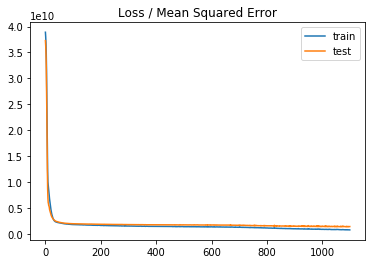

In [334]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [335]:
sale_price_keras = model.predict(test_new)
print(sale_price_keras)

[126834.75 154830.02 214981.77 ... 184299.14 142361.1  229289.86]


In [336]:
sub['SalePrice'] = sale_price_keras
sub.to_csv('submission.csv',index=False)
sub.head()

,Id,SalePrice
0,1461,126834.750000
1,1462,154830.015625
2,1463,214981.765625
3,1464,190520.109375
4,1465,169189.343750
